Aim: We are trying to predict the changes in Tesla's stock price since 2010 to 2020, analzying what factors play an important role in change of the stock price

https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("TSLA.csv")

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


**Converting Date into Date Time type**

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**Extracting date into year, month, date, quarter for ease of analysis**

In [52]:
import datetime

df['day_of_week'] = df['Date'].dt.weekday_name
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Date_Only'] =df['Date'].dt.day
df['Quarter'] =df['Date'].dt.quarter

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,Tuesday,2020,1,28,1
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,Wednesday,2020,1,29,1
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,Thursday,2020,1,30,1
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,Friday,2020,1,31,1
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,Monday,2020,2,3,1


**Understanding statistics of the data**

In [53]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416,2416.000000,2416.000000,2416.000000,2416.000000
unique,2416,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,2016-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,495,NaN,NaN,NaN,NaN
first,2010-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,NaN,2014.776904,6.645281,15.748344,2.551325
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,NaN,2.787784,3.445464,8.757534,1.116716
min,NaN,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,NaN,2010.000000,1.000000,1.000000,1.000000
25%,NaN,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,NaN,2012.000000,4.000000,8.000000,2.000000


**Checking if there is any year which is outside 2010-2020**

In [54]:
df['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Plotting the avaliabe data with respect to time to understand its pattern

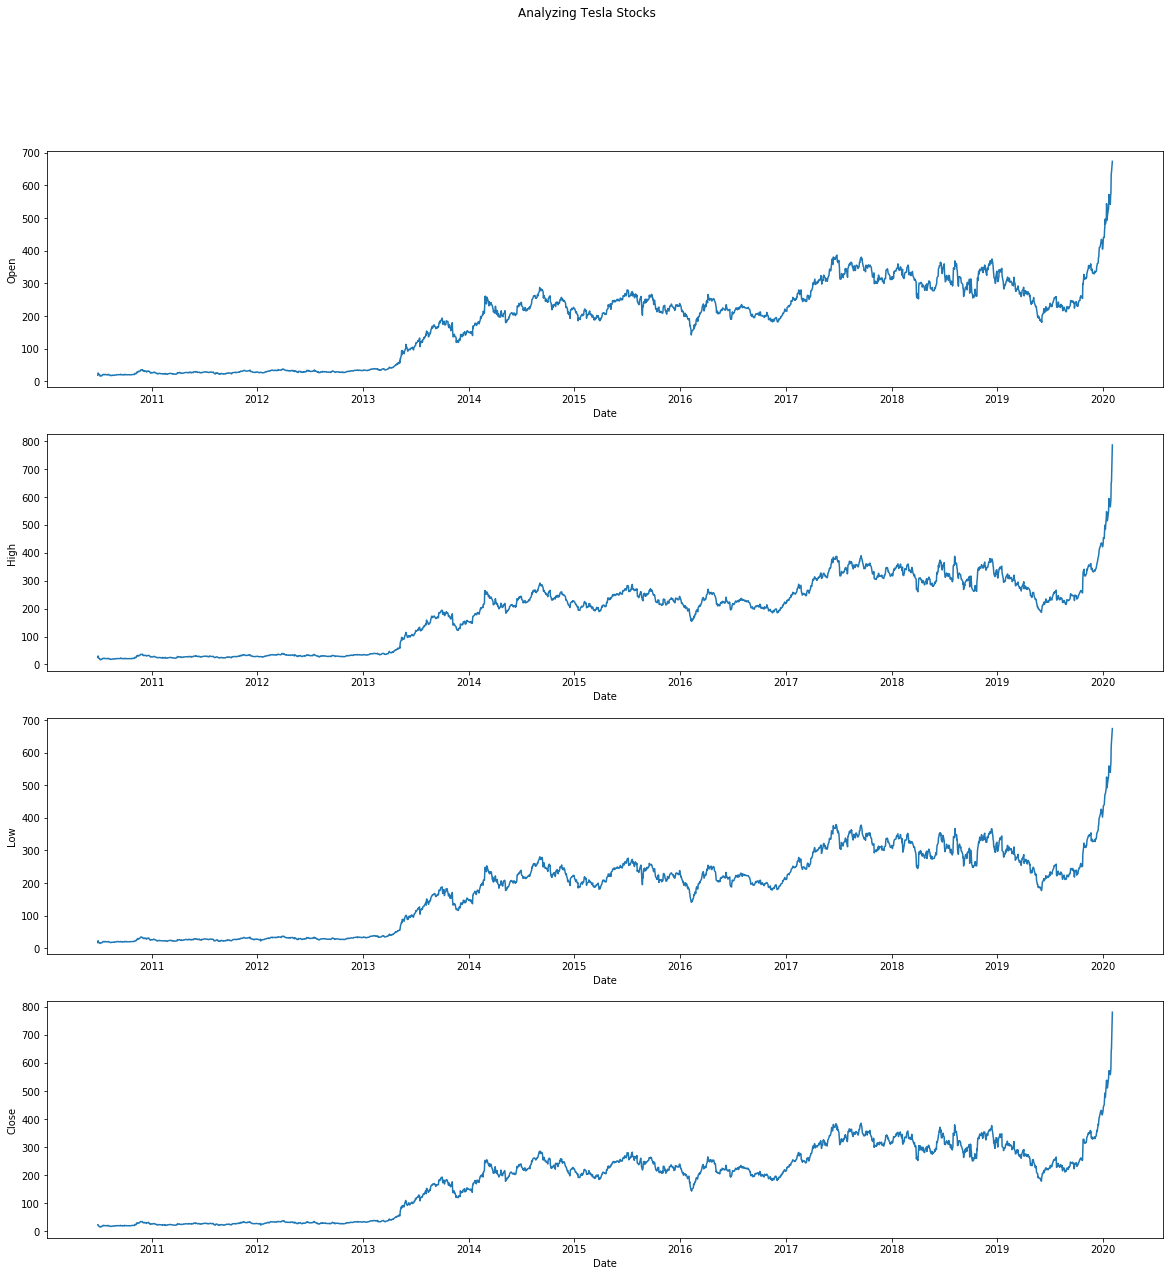

In [55]:
from pandas.plotting import register_matplotlib_converters
fig, ax = plt.subplots(4,1,figsize=(20,20))
register_matplotlib_converters()
sns.lineplot(ax=ax[0], x="Date", y="Open",data=df)
sns.lineplot(ax=ax[1], x="Date", y="High",data=df)
sns.lineplot(ax=ax[2], x="Date", y="Low",data=df)
sns.lineplot(ax=ax[3], x="Date", y="Close",data=df)
plt.suptitle('Analyzing Tesla Stocks')
plt.show()

We can see a steady graph from 2010 to 2013 there was a steady graph

**Creating a Unique Identifier for each day**

In [56]:
df['Date_Value'] = df.Year.astype(str) +df.Month.astype(str) + df.Quarter.astype(str) +df.Date_Only.astype(str)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter,Date_Value
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,Tuesday,2010,6,29,2,20106229
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,Wednesday,2010,6,30,2,20106230
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,Thursday,2010,7,1,3,2010731
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,Friday,2010,7,2,3,2010732
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,Tuesday,2010,7,6,3,2010736


***Now are using another data set https://www.kaggle.com/kulgen/elon-musks-tweets. This contains list of tweets realted to elon musk tesla from 2010 to 2017***

In [57]:
df_tweet=pd.read_csv("elonmusk_tweets.csv")

In [58]:
df_tweet.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


**Trying to Categorize the words into two differnt category, one category realted to positive words and one related to negative words**

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
doc_term_matrix = count_vect.fit_transform(df_tweet['text'].values.astype('U'))

In [60]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [61]:
# import random

# for i in range(10):
#     random_id = random.randint(0,len(count_vect.get_feature_names()))
#     print(count_vect.get_feature_names()[random_id])

In [62]:
# first_topic = LDA.components_[0]
# top_topic_words = first_topic.argsort()[-10:]
# top_topic_words


In [63]:
# for i in top_topic_words:
#     print(count_vect.get_feature_names()[i])

In [64]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['falcon', 'landing', 'good', 'yes', 'like', 'rocket', 'x80', 'xe2', 'https', 'http']


Top 10 words for topic #1:
['teslamotors', 'spacex', 'xa6', 'model', 'x80', 'xe2', 'tesla', 'http', 'https', 'rt']




In [65]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(2819, 2)

In [66]:
df_tweet['Category'] = topic_values.argmax(axis=1)

In [67]:
df_tweet.head()

,id,created_at,text,Category
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',1
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",1


In [68]:
df_tweet.to_csv("output.csv")

In [69]:
df_tweet[df_tweet['Category']==0].head()

,id,created_at,text,Category
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0
5,848415731502923777,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopt...",0
8,848244577521647616,2017-04-01 18:44:01,"b""Why did we waste so much time developing sil...",0


**Based on these values we know that the text is not well categorized, so I used a better method of sentimental analysis**

In [70]:
df_tweet.dtypes

id             int64
created_at    object
text          object
Category       int64
dtype: object

In [71]:
df_tweet['created_at'] = pd.to_datetime(df_tweet['created_at'])

In [72]:
df_tweet.dtypes

id                     int64
created_at    datetime64[ns]
text                  object
Category               int64
dtype: object

**Using the Afinn Library**

In [73]:
from afinn import Afinn
afinn = Afinn(language='en')

In [74]:
df_tweet['afinn_score'] = df_tweet['text'].apply(afinn.score)

Extracting dates which will be used for ease of analysis later

In [75]:
df_tweet['day_of_week'] = df_tweet['created_at'].dt.weekday_name
df_tweet['Year'] =df_tweet['created_at'].dt.year
df_tweet['Month'] =df_tweet['created_at'].dt.month
df_tweet['Date_Only'] =df_tweet['created_at'].dt.day
df_tweet['Quarter'] =df_tweet['created_at'].dt.quarter

In [76]:
df_tweet.to_csv("output.csv")

In [77]:
df_tweet.head()

,id,created_at,text,Category,afinn_score,day_of_week,Year,Month,Date_Only,Quarter
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0,0.0,Wednesday,2017,4,5,2
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0,0.0,Monday,2017,4,3,2
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0,0.0,Monday,2017,4,3,2
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',1,0.0,Monday,2017,4,3,2
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",1,-6.0,Sunday,2017,4,2,2


Concatinating the time stamp to find unique values

In [78]:
# df_tweet['Date_Value'] = df_tweet.Year.astype(str) + df_tweet.Month.astype(str) + df_tweet.Date_Only.astype(str)
# df_tweet['Month_Value'] = df_tweet.Year.astype(str) + df_tweet.Month.astype(str) 
df_tweet['Date_Value'] = df_tweet.Year.astype(str) +df_tweet.Month.astype(str) + df_tweet.Quarter.astype(str) +df_tweet.Date_Only.astype(str)

Converting the nd array to dataframe

In [79]:
df_tweet_summary=df_tweet.groupby('Date_Value')['afinn_score'].sum()
df_tweet_summary=pd.DataFrame(df_tweet_summary)

In [80]:
df_tweet_summary.reset_index(inplace = True) 
df_tweet_summary.head()

,Date_Value,afinn_score
0,2010624,-1.0
1,20111241,7.0
2,201112421,15.0
3,201112422,0.0
4,201112424,6.0


In [81]:
list(df_tweet_summary.columns) 

['Date_Value', 'afinn_score']

In [82]:
new_df = pd.merge(df, df_tweet_summary,  how='left', left_on=['Date_Value'],
                  right_on = ['Date_Value'])

In [83]:
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter,Date_Value,afinn_score
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,Tuesday,2010,6,29,2,20106229,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,Wednesday,2010,6,30,2,20106230,NaN
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,Thursday,2010,7,1,3,2010731,NaN
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,Friday,2010,7,2,3,2010732,NaN
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,Tuesday,2010,7,6,3,2010736,NaN


In [84]:
new_df=new_df.fillna(0)

In [85]:
new_df[new_df['Date_Value']=='201112421']

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter,Date_Value,afinn_score
375,2011-12-21,27.91,28.07,26.030001,27.57,27.57,1705500,Wednesday,2011,12,21,4,201112421,15.0


The date 20110121 and the date 20111201 are considerd same since the 0's are removed hence we will add quarter to our unique string

We have added a basic score to to each day that we have and categorized it according to good or bad tweets on that day
Above that we had added the score of each day and that is now in the tweet score column. This data is limited to 2017, hence we will try to analyze those years first

In [86]:
new_df.rename(columns={"afinn_score": "Tweet_Score"}, inplace=True)

In [87]:
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter,Date_Value,Tweet_Score
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,Tuesday,2010,6,29,2,20106229,0.0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,Wednesday,2010,6,30,2,20106230,0.0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,Thursday,2010,7,1,3,2010731,0.0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,Friday,2010,7,2,3,2010732,0.0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,Tuesday,2010,7,6,3,2010736,0.0


In [88]:
print("\n******* Maximum Score ********\n")
print(new_df[new_df.Tweet_Score == new_df.Tweet_Score.max()])
print("\n******* Minimum Score ********\n")
print(new_df[new_df.Tweet_Score == new_df.Tweet_Score.min()])


******* Maximum Score ********

           Date        Open        High         Low       Close   Adj Close  \
1696 2017-03-24  255.699997  263.890015  255.009995  263.160004  263.160004   

       Volume day_of_week  Year  Month  Date_Only  Quarter Date_Value  \
1696  5647300      Friday  2017      3         24        1   20173124   

      Tweet_Score  
1696         67.0  

******* Minimum Score ********

          Date    Open   High         Low       Close   Adj Close    Volume  \
855 2013-11-19  119.43  129.0  119.220001  126.089996  126.089996  19816200   

    day_of_week  Year  Month  Date_Only  Quarter Date_Value  Tweet_Score  
855     Tuesday  2013     11         19        4  201311419        -18.0  


Here we can see that on 24th March 2017 tesla annouced the much awaited update V8.1
Link: https://www.teslarati.com/tesla-v8-1-release-notes-autopilot-2-headrest-falcon-wing-setting/


In [97]:
max_2017=new_df[new_df['Year']==2017].High.max()
new_df[new_df['High']==max_2017]


,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter,Date_Value,Tweet_Score
1818,2017-09-18,380.25,389.609985,377.679993,385.0,385.0,7188000,Monday,2017,9,18,3,20179318,0.0


As we can see on Septmeber 18, 2017 the dilivery of Model 3 was ramped up:
Link : https://electrek.co/2017/09/18/tesla-stock-tsla-all-time-high-model-3/
But the tweet score is 0 for that, hence the dataset that we have for tweets might have some missing values. 
Let us first check it

In [102]:
df_tweet.head()

,id,created_at,text,Category,afinn_score,day_of_week,Year,Month,Date_Only,Quarter,Date_Value
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0,0.0,Wednesday,2017,4,5,2,2017425
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0,0.0,Monday,2017,4,3,2,2017423
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0,0.0,Monday,2017,4,3,2,2017423
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',1,0.0,Monday,2017,4,3,2,2017423
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",1,-6.0,Sunday,2017,4,2,2,2017422


In [114]:
df_tweet[(df_tweet['Year']==2017)&(df_tweet['Month']==9) ]

,id,created_at,text,Category,afinn_score,day_of_week,Year,Month,Date_Only,Quarter,Date_Value


As we see we don't have any data for the Month of Septmeber, the last date that we have in Dataset is April 5, 2017

We will check the highest stock price till the month of April 2017, just to check our hypothesis

In [126]:
max_2017_apr=new_df[((new_df['Year']==2017) & (new_df['Month']<5) & (new_df['Date_Only']<4))].High.max()
new_df[(new_df['High']==max_2017_apr) & (new_df['Year']==2017)]

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,Year,Month,Date_Only,Quarter,Date_Value,Tweet_Score
1702,2017-04-03,286.899994,299.0,284.579987,298.519989,298.519989,13888600,Monday,2017,4,3,2,2017423,0.0


In [127]:
df_tweet[(df_tweet['Year']==2017)&(df_tweet['Month']==4)& (df_tweet['Date_Only']==3)]

,id,created_at,text,Category,afinn_score,day_of_week,Year,Month,Date_Only,Quarter,Date_Value
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0,0.0,Monday,2017,4,3,2,2017423
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0,0.0,Monday,2017,4,3,2,2017423
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',1,0.0,Monday,2017,4,3,2,2017423


We  now see that the Tweets that we have for 3rd April 2017 are not relevant but still we have the highest stock price on that day, lets see the graph of stock price leading upto that day and check the tweets score for the day it was changed

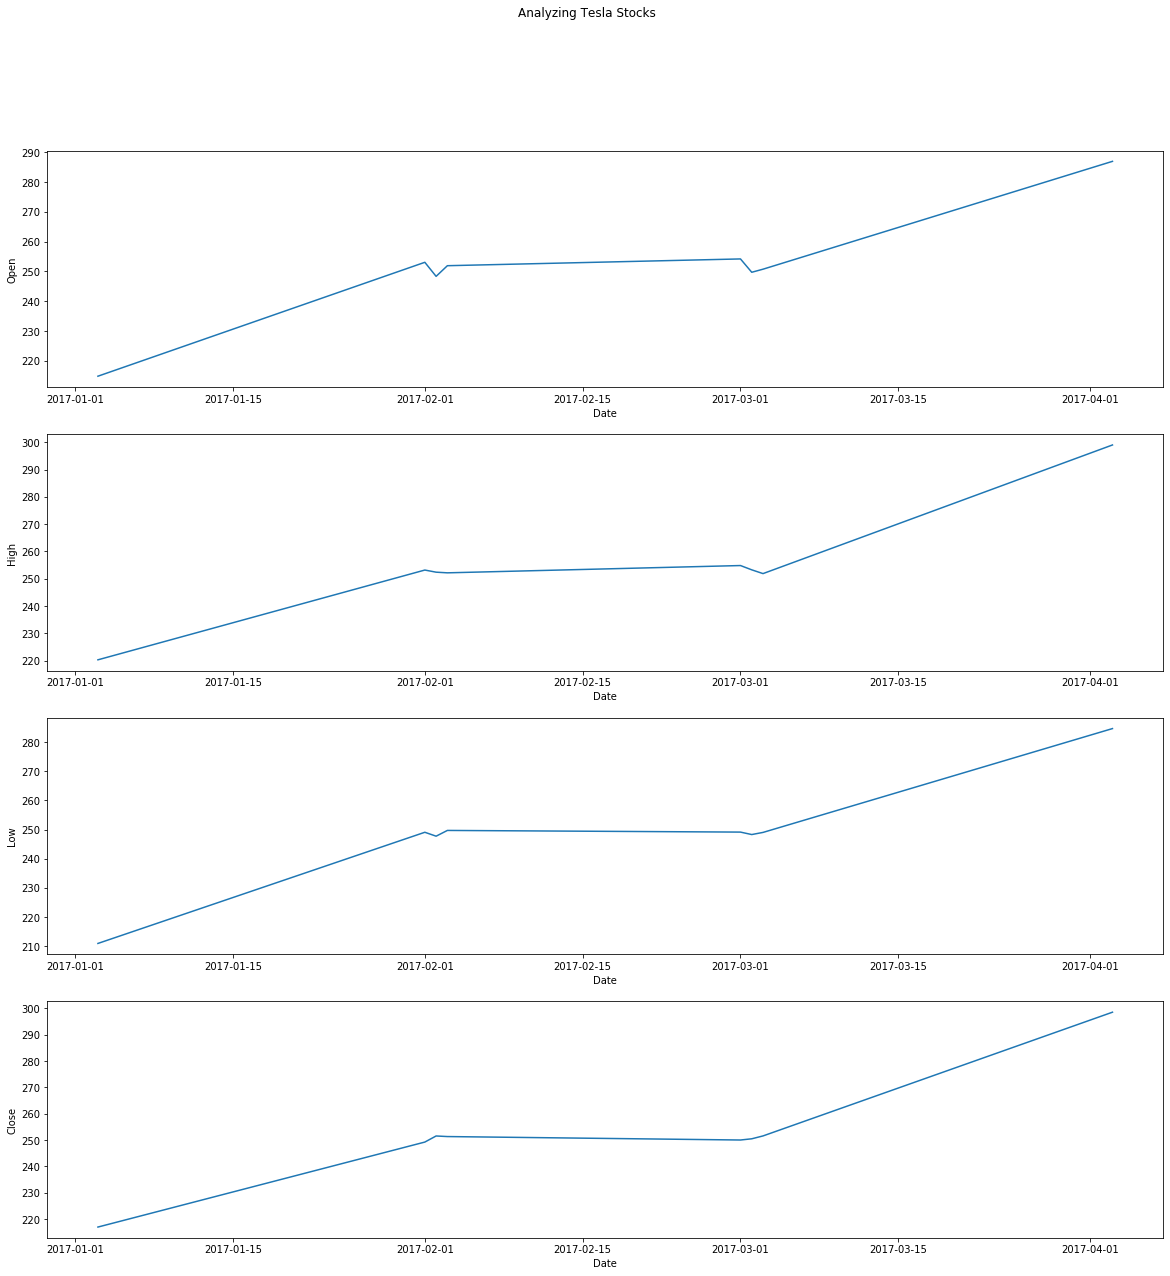

In [130]:
df_Apr=new_df[((new_df['Year']==2017) & (new_df['Month']<5) & (new_df['Date_Only']<4))]
fig, ax = plt.subplots(4,1,figsize=(20,20))
register_matplotlib_converters()
sns.lineplot(ax=ax[0], x="Date", y="Open",data=df_Apr)
sns.lineplot(ax=ax[1], x="Date", y="High",data=df_Apr)
sns.lineplot(ax=ax[2], x="Date", y="Low",data=df_Apr)
sns.lineplot(ax=ax[3], x="Date", y="Close",data=df_Apr)
plt.suptitle('Analyzing Tesla Stocks')
plt.show()


Here we can see a sharp rise on 2nd March, Let us anaylze the tweets on that day

In [140]:
df_tweet[(df_tweet['Year']==2017)&(df_tweet['Month']==3)& (df_tweet['Date_Only']==2)].head()

,id,created_at,text,Category,afinn_score,day_of_week,Year,Month,Date_Only,Quarter,Date_Value
132,837113202030759937,2017-03-02 01:31:54,"b""Thank you for the lovely letter. That sounds...",0,10.0,Thursday,2017,3,2,1,2017312


**on this day we can see the top google search as : **
<img src="Image.PNG">

I have one hypothesis: 
By using tweets data; and sentimental analysis on it-
We can see if the increase in stock price was due to any good news in the company or decrease in stock price is due to a bad news?  

This will help us understand in what capacity do external factors that are not in control of company play a role in stock market

Next step is to create a function which will give me top 10 highest stock price and thier tweet score of the day, We will compare that for years 2011 to 2016. If the results are in favour of hypothesis, we will consider our hypothesis to be statistically significant